# Faizan ul Haq
# Task 1
## EzLine

In [ ]:
!nvidia-smi    #checks if it has the access to a gpu

Mon Aug 21 17:16:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()    #gets the current directory
print(HOME)

/content


In [ ]:
%cd {HOME}

/content


In [ ]:
!pip install ultralytics

from ultralytics import YOLO
from glob import glob
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.3/609.3 kB 5.7 MB/s eta 0:00:00


In [ ]:
!mkdir {HOME}/datasets
!mkdir {HOME}/datasets/v8    #creates a folder


In [ ]:
# os.getcwd()
%cd {HOME}/datasets/v8

/content/datasets/v8


In [ ]:
os.getcwd()

'/content/datasets/v8'

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2pOXZDMttTSxXzV6Uwp6")
project = rf.workspace("fracture-uofxm").project("bone-fracture-detection-ivsy6")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=656176dbf01f6ca8168f61b66fc8700ae0517c484b3868eb00d3edf0e34bfe38
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.


Extracting Dataset Version Zip to Bone-fracture-detection-1 in yolov8:: 100%|██████████| 2084/2084 [00:00<00:00, 2358.79it/s]


## Training Model

In [ ]:
!yolo task=detect \
mode=train \
model=yolov8n.pt \
data={dataset.location}/data.yaml \
epochs=35 \
imgsz=800 \
plots=True \
verbose = False

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/v8/Bone-fracture-detection-1/data.yaml, epochs=35, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

## Validate Model

In [ ]:
!yolo task=detect \
mode=val \
model="/content/datasets/v8/runs/detect/train/weights/best.pt" \
data={dataset.location}/data.yaml


Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/datasets/v8/Bone-fracture-detection-1/valid/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.72it/s]
                   all         99        117      0.851       0.59      0.715      0.338
Speed: 8.4ms preprocess, 10.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val2


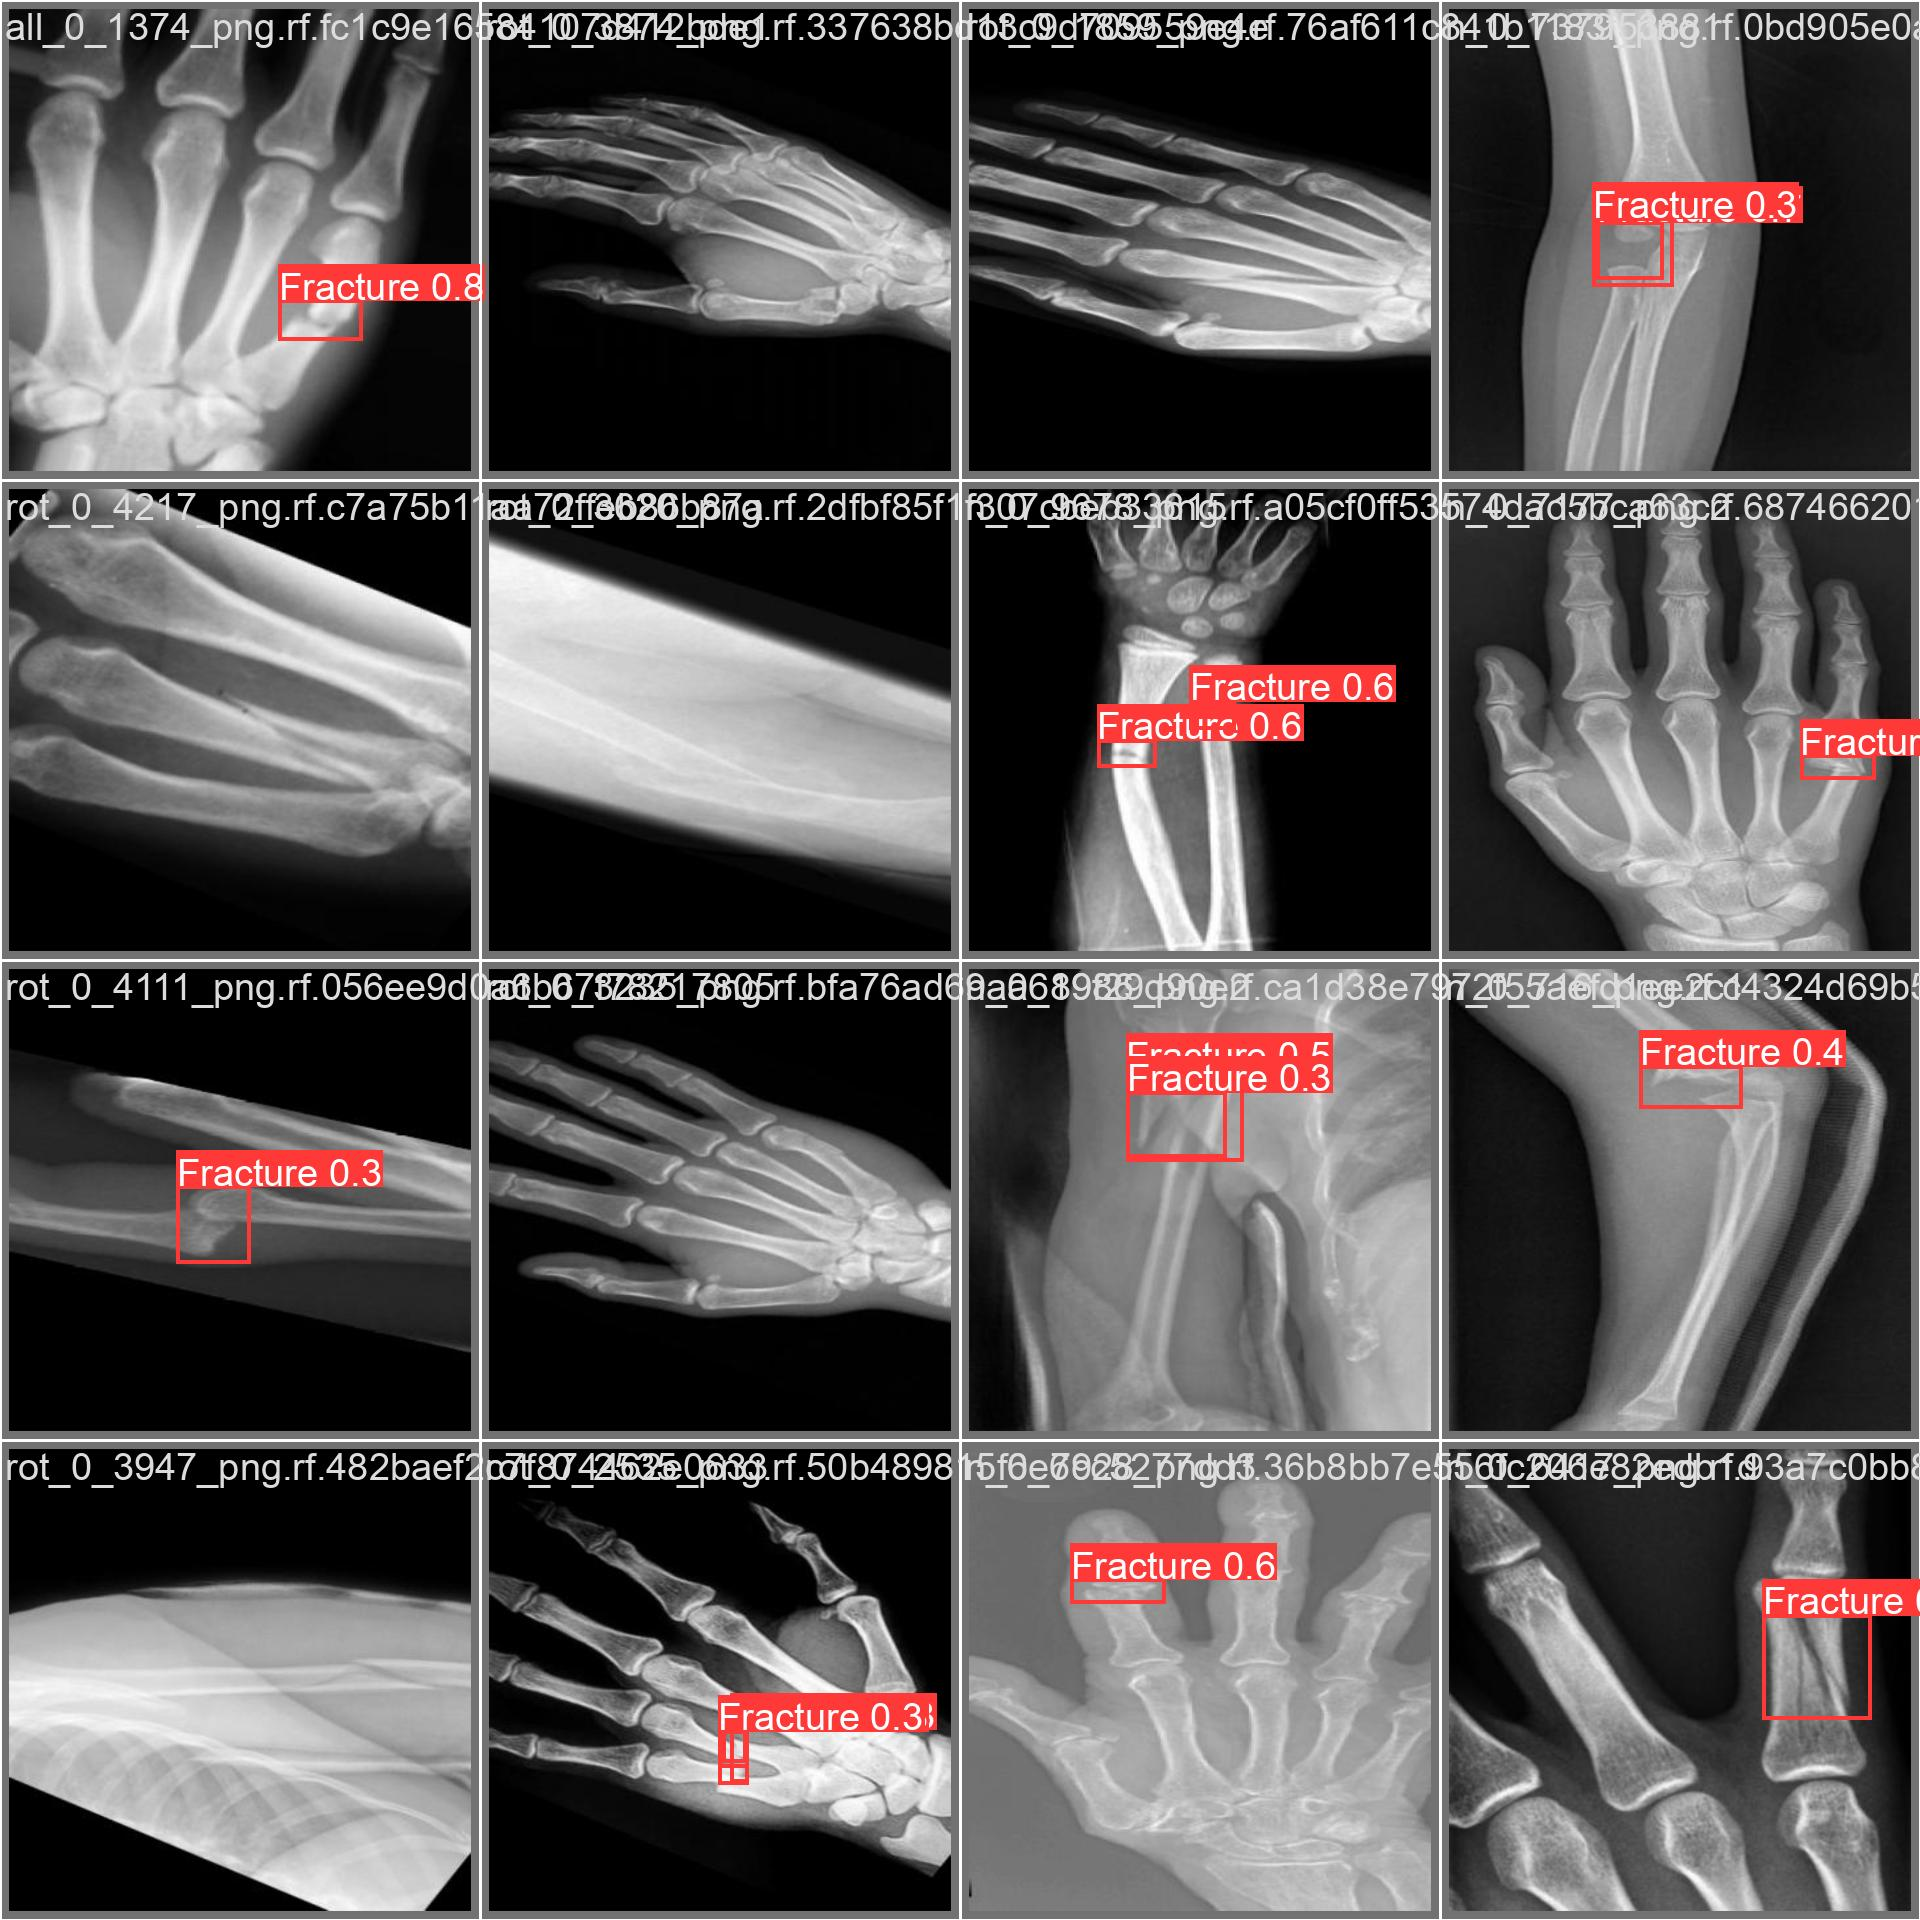

In [ ]:
from IPython.display import display , Image
Image(filename = f'/content/datasets/v8/runs/detect/val/val_batch0_pred.jpg' , width = 800)

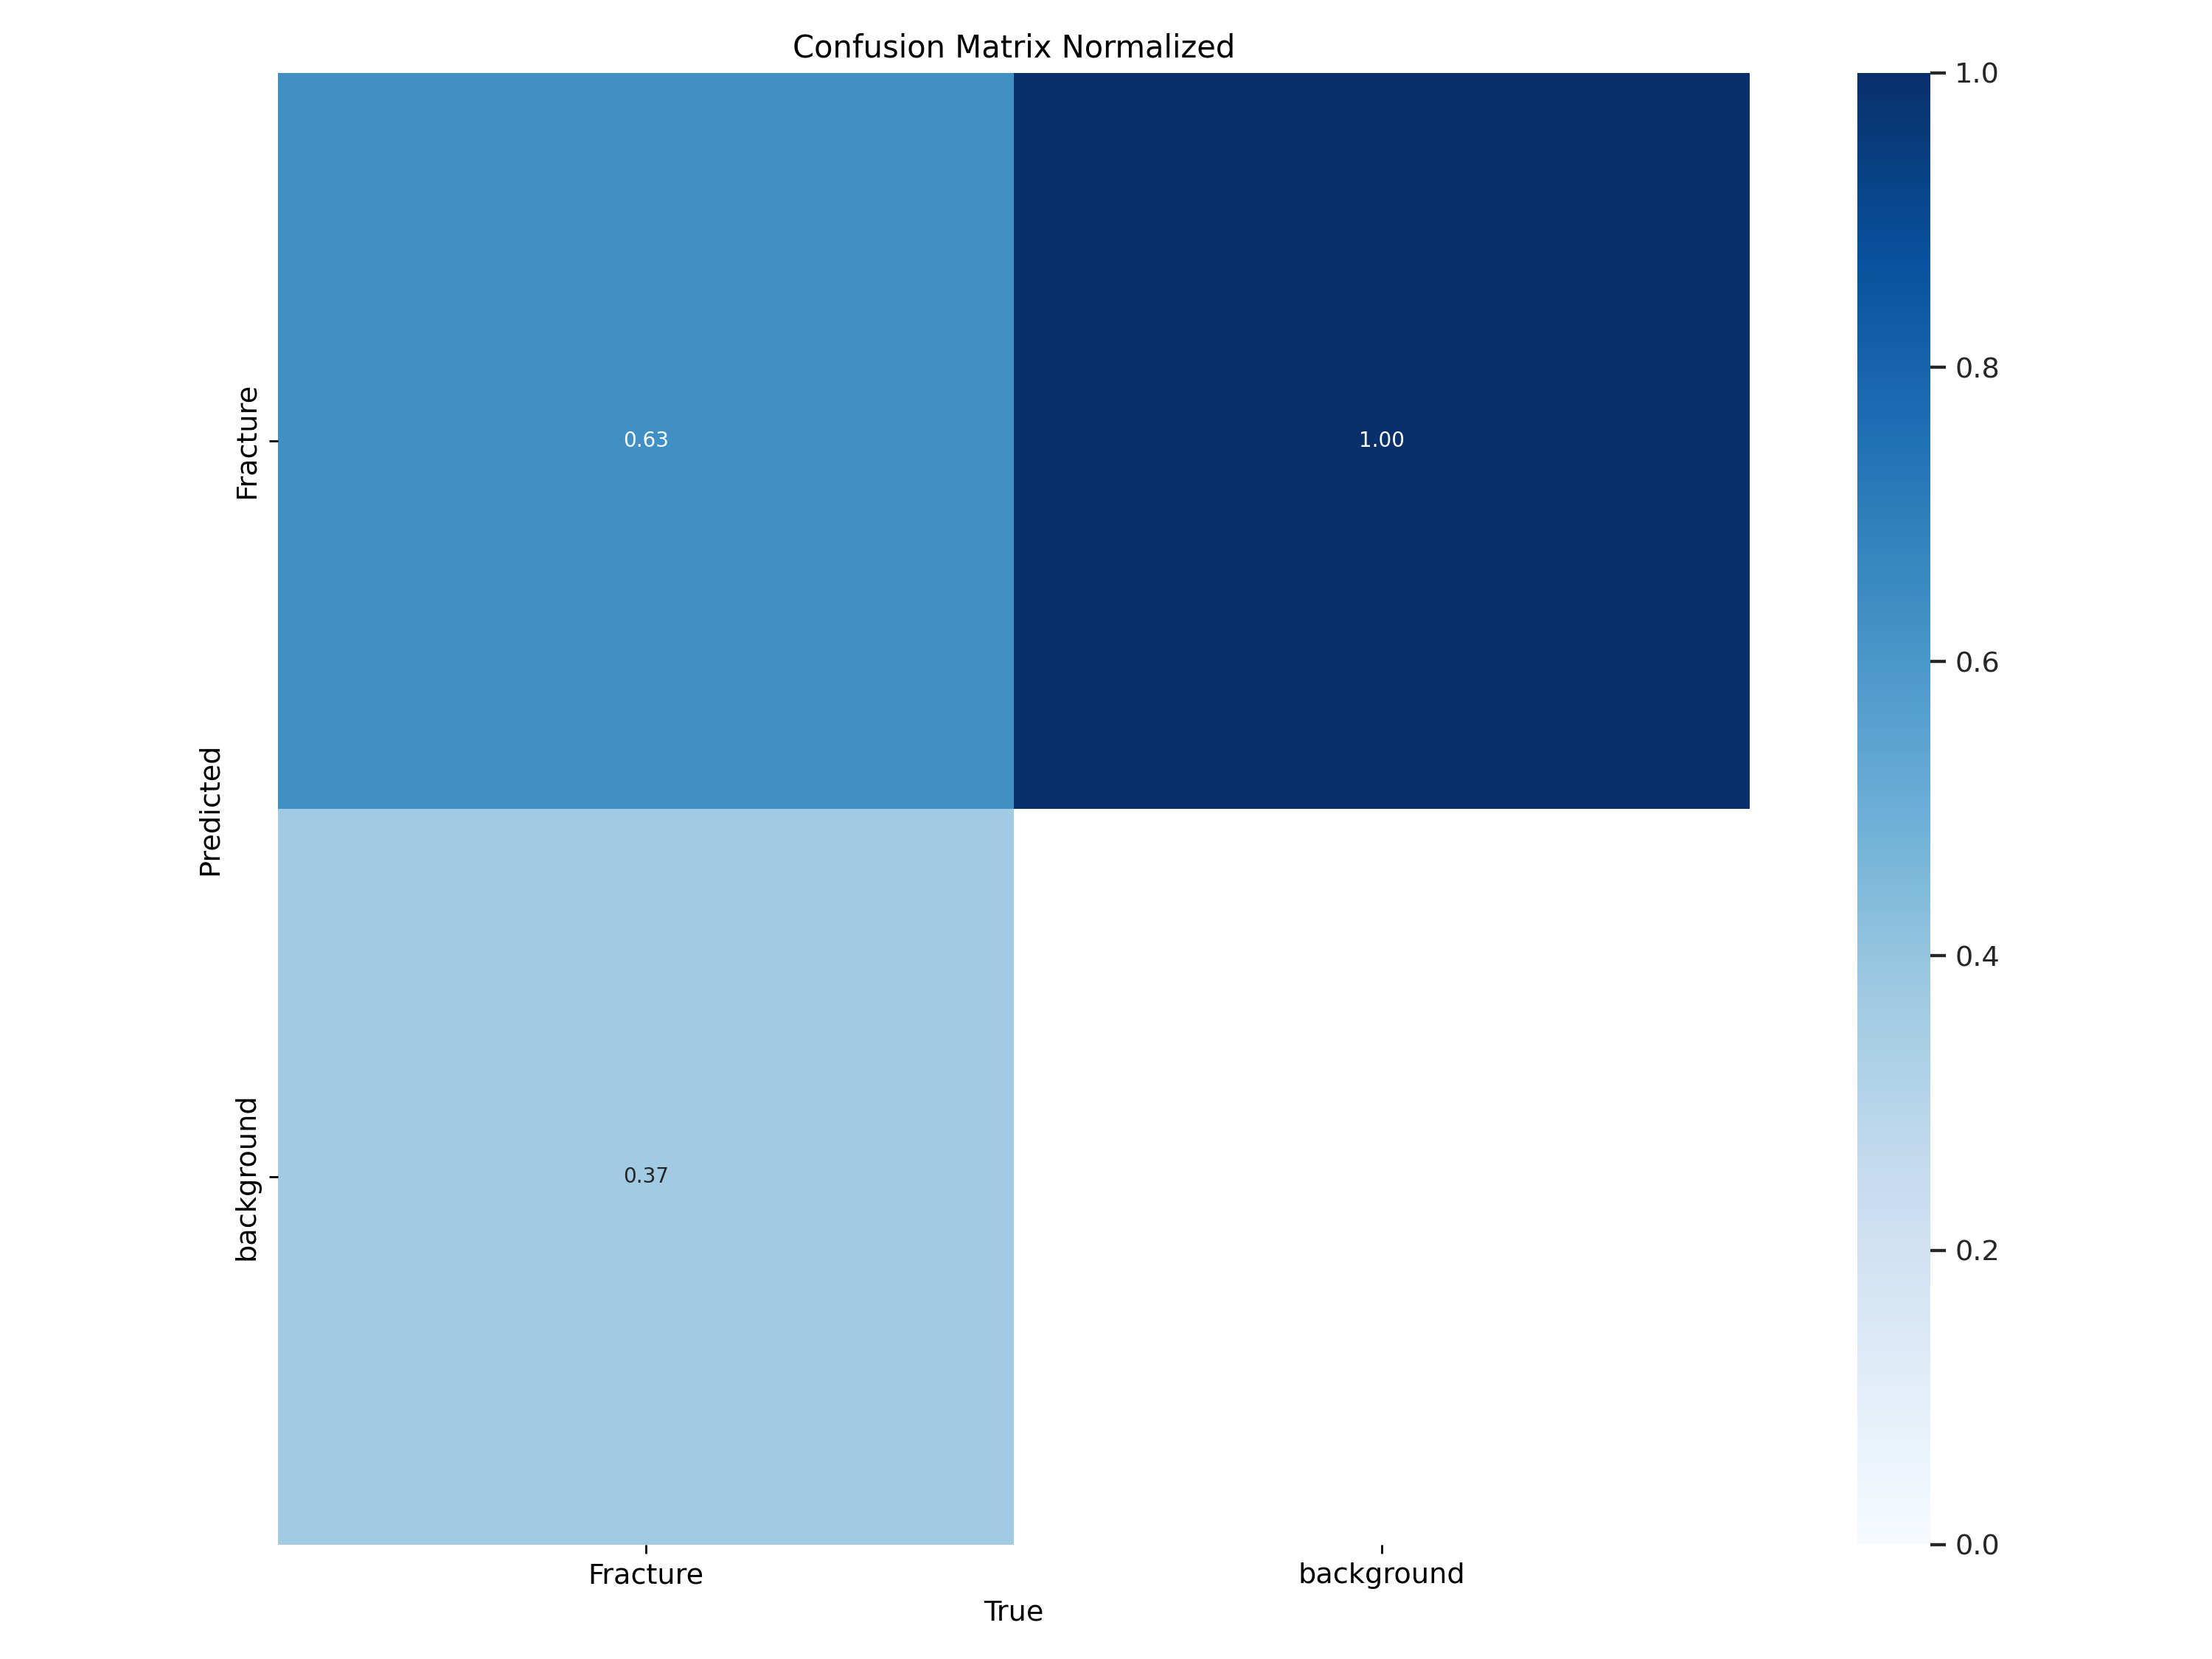

In [ ]:
Image(filename = f'/content/datasets/v8/runs/detect/val/confusion_matrix_normalized.png' , width = 800)

## Prediction

In [ ]:
!yolo task=detect \
mode=predict \
model=/content/datasets/v8/runs/detect/train/weights/best.pt \
conf=0.25 \
source='/content/datasets/v8/Bone-fracture-detection-1/test/images/bri_0_3100_png.rf.134cd4027e4322a6d17e25128e423634.jpg' \
save=True

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/datasets/v8/Bone-fracture-detection-1/test/images/bri_0_3100_png.rf.134cd4027e4322a6d17e25128e423634.jpg: 640x640 1 Fracture, 9.4ms
Speed: 3.5ms preprocess, 9.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/best.pt')

results = model.predict('/content/googleXray.jpg')

print(results)


image 1/1 /content/googleXray.jpg: 640x544 1 Fracture, 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 544)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'Fracture'}
orig_img: array([[[ 97,  96,  98],
        [170, 169, 171],
        [158, 157, 159],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[170, 169, 171],
        [244, 243, 245],
        [231, 230, 232],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[157, 156, 158],
        [231, 230, 232],
        [218, 217, 219],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
    

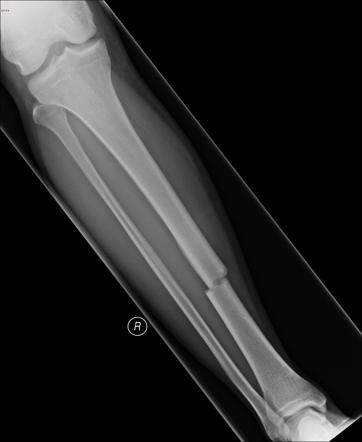

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(results[0].orig_img)


In [ ]:
type(results[0])

ultralytics.engine.results.Results

In [ ]:
import cv2

In [ ]:
img = '/content/googleXray.jpg'
# results = YOLO(img)                 # run prediction on img
predIMG=0
for result in results:                                         # iterate results
    boxes = result.boxes.cpu().numpy()                         # get boxes on cpu in numpy
    for box in boxes:                                          # iterate boxes
        r = box.xyxy[0].astype(int)                            # get corner points as int
        print(r)                                               # print boxes
        predIMG = cv2.rectangle(results[0].orig_img, r[:2], r[2:], (255, 255, 255), 2)   # draw boxes on img

[196 263 239 295]


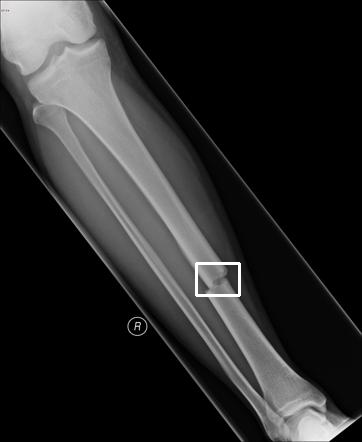

In [ ]:
cv2_imshow(predIMG)

In [ ]:
len(results[0].boxes.xyxy)

1

# Trying To Train with Canny Edge Detection

In [ ]:
!mkdir {HOME}/datasets/canny

In [ ]:
%cd {HOME}/datasets/canny

/content/datasets/canny


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2pOXZDMttTSxXzV6Uwp6")
project = rf.workspace("fracture-uofxm").project("bone-fracture-detection-ivsy6")
dataset = project.version(1).download("yolov8")


In [ ]:
os.getcwd()

'/content/datasets/canny'

### converting dataset into canny images

In [ ]:
import glob
from tqdm import tqdm
import ultralytics
import cv2
from skimage.color import gray2rgb
import os

In [ ]:
input_folders = {
    "train": "/content/datasets/canny/Bone-fracture-detection-1/train",
    "test": "/content/datasets/canny/Bone-fracture-detection-1/test",
    "valid": "/content/datasets/canny/Bone-fracture-detection-1/valid"
}

output_folders = {
    "train": "/content/datasets/canny/Bone-fracture-detection-1/train/canny",
    "test": "/content/datasets/canny/Bone-fracture-detection-1/test/canny",
    "valid": "/content/datasets/canny/Bone-fracture-detection-1/valid/canny"
}

# Create output folders if they don't exist
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)


In [ ]:
os.listdir('/content/datasets/canny/Bone-fracture-detection-1/train/images')

In [ ]:
def process_and_save_images(input_folder, output_folder):
    image_folder = os.path.join(input_folder, "images")
    canny_folder = os.path.join(output_folder, "images")

    os.makedirs(canny_folder, exist_ok=True)

    image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        canny_path = os.path.join(canny_folder, image_file)

        # Load image using OpenCV
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply Canny edge detection
        canny_img = cv2.Canny(img, 60, 50 , L2gradient=False)  # Adjust these parameters as needed
        canny_img = gray2rgb(canny_img)

        # Save Canny image
        cv2.imwrite(canny_path, canny_img)

# Process images for each dataset
for dataset, input_folder in input_folders.items():
    output_folder = output_folders[dataset]
    process_and_save_images(input_folder, output_folder)

print("Canny edge images generated and saved.")


Canny edge images generated and saved.


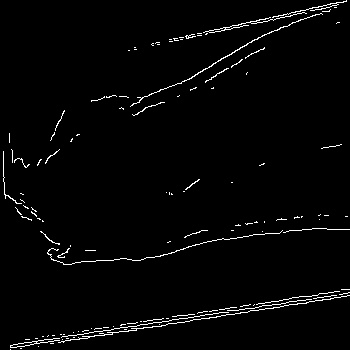

In [ ]:
from IPython.display import display , Image
Image(filename = f'/content/datasets/canny/Bone-fracture-detection-1/test/canny/images/bri_0_1772_png.rf.655b8cf6be49a337aea59dce59af5002.jpg' , width = 250)

As a result we can see even with different arguments in the canny function the edges become lost and will not helpl with teaching the model

In [ ]:
i=0
for folder in ['test','train','valid']:
  for file in tqdm(glob.glob(f'/content/datasets/canny/Bone-fracture-detection-1/{folder}/**/*.jpg')):    #goes into valid, train, test folders and works on every jpg in it
    i+=1
print(i)

100%|██████████| 99/99 [00:00<00:00, 692060.16it/s]

1036


## using our trained model

In [ ]:
!pip install yolo

In [ ]:
!pip install --upgrade urllib3

In [ ]:
import ultralytics
import cv2
from skimage.color import gray2rgb
# cvImage = gray2rgb(cvImage)

# cvImage = cv2.cvtColor(cvImage, cv2.COLOR_GRAY2BGR)
model = ultralytics.YOLO('/content/datasets/v8/runs/detect/train/weights/best.pt')
image = cv2.imread('/content/datasets/v8/Bone-fracture-detection-1/test/images/all_0_4061_png.rf.d0d1ea8aec09016a42edca8e1ba73ebf.jpg')
can1 = cv2.Canny(image, 100, 100 , L2gradient=False)
cvImage = gray2rgb(can1)
prediction = model.predict(image, conf=0.25 , verbose=False)
pred = prediction[0].boxes.data
counter = len(pred)
print('Number of fractures are: ',counter)


Number of fractures are:  1


In [ ]:
prediction[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'Fracture'}
orig_img: array([[[248, 248, 248],
        [251, 251, 251],
        [254, 254, 254],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[252, 252, 252],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       ...,

       [[ 45,  45,  45],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [112, 112, 112],
        [118, 118, 118],
        [122, 122, 122]],

       [[ 45,  45,  45],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [106, 106, 106],
        [112, 112, 112],
     

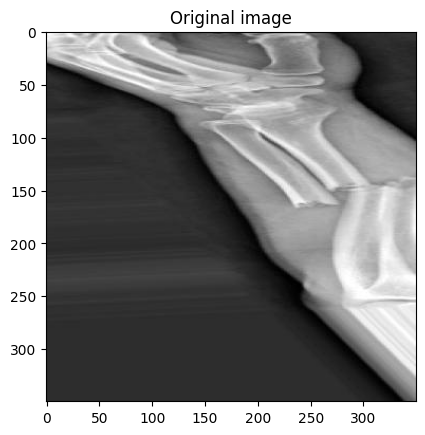

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(prediction[0].orig_img)
plt.title('Original image')
plt.show()

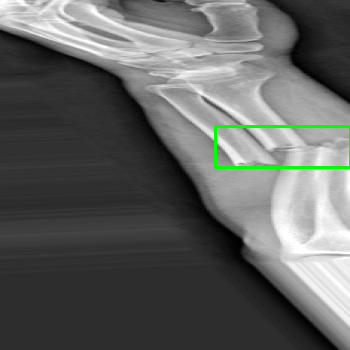

In [ ]:
# plt.title('prediction')
from google.colab.patches import cv2_imshow

for box in pred:
  x1, y1, x2, y2 = box[:4]   #extracts the coordinates
  image = cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Draw rectangle

# Display the image with predicted bounding boxes
# cv2.imshow('Predicted Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2_imshow(image)